# CS375 Assignment 2 Lab Report
#### Group 6 

## Part 1: Task Generalization

In [1]:
%matplotlib inline 
import os
import numpy as np
import tensorflow as tf
import pymongo as pm
import gridfs
import cPickle
import scipy.signal as signal
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook, trange
from assignment_utils import *

### Getting data from the database

In [2]:
from model_switcher import *

In [3]:
my_model_shallow = model_switcher(model_name = 'shallow_bottle',
                          data_name = 'cifar10',
                          loss_name = 'ae_conv1_loss')

In [4]:
vars(my_model_shallow)

{'collname': 'shallow_bottle_ae_conv1_loss',
 'data_name': 'cifar10',
 'dbname': 'cifar10',
 'exp_fn': <class experiments.cifar10 at 0x7f1cabe04870>,
 'exp_id': 'yesyes',
 'layers': ['conv1', 'deconv1'],
 'loss_fn': <function losses.ae_conv1_loss>,
 'loss_name': 'ae_conv1_loss',
 'model_fn': <function models.shallow_bottle>,
 'model_name': 'shallow_bottle'}

In [5]:
#v_list = ['V0V3V6', 'V6']
#target_layers = ['pool1', 'conv2', 'conv3', 'conv4', 'conv5', 'pool5', 'fc6', 'fc7']
#step_list = [90000, 150000, 240000]

In [6]:
coll = p_get_coll(vars(my_model_shallow)['collname'], vars(my_model_shallow)['dbname'])
print(coll)

coll.distinct('exp_id')

Collection(Database(MongoClient(host=['localhost:24444'], document_class=dict, tz_aware=False, connect=True), u'cifar10'), u'shallow_bottle_ae_conv1_loss.files')


[u'ha12', u'ha12_2000_V6']

### Plotting the training curve
To see the training curve for the experiment, we pull the training loss and plot it, along with a smoothed version of the training loss obtained by convolving the loss with a boxcar.

In [7]:
# TODO Double check this. Bit hacky
texp_id = coll.distinct('exp_id')[-1]
p22_training(texp_id,coll)

ValueError: math domain error

### Plotting the validation results

In [ ]:
l2_loss, img_inputs, img_prediction = get_validation_data(texp_id, coll, 20)
plot_l2_loss(l2_loss, texp_id)

np_inputs = np.array(img_inputs).transpose([0,2,3,4,1])
np_prediction = np.array(img_prediction).transpose([0,2,3,4,1])
my_shape = np_inputs.shape

In [ ]:
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread


In [ ]:
def show_row(in_row, num_show = None):
    if num_show is None:
        num_show = len(in_row)
    fig = figure(figsize = [20, 6])
    for i in range(num_show):
        a = fig.add_subplot(1,num_show, i+1)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
        imshow(in_row[:,:,:,i])

In [ ]:
show_row(np_inputs[-1,:].squeeze(), 5)

In [ ]:
show_row(np_prediction[-1,:].squeeze(), 5)

## Part 2: Representational Similararity Analysis (RSA)


In [8]:
#data = {}
#for iv in v_list:
    #for istep in step_list:
data_exp_id = coll.distinct('exp_id')[-1]
data = p_get_data_list(coll, vars(my_model_shallow)['collname'], 1, 1, data_exp_id)

2000 1


### Analyzing the RDM results

We will start with visualizing the RDMs we computed for each layer and the IT neurons. 

In [ ]:
step = 2000
plot_rdms(data, vars(my_model_shallow)['layers'], step)

### Analyzing the categorization results

Now let's visualize the results of the categorization and within categorization test we performed for each layer. Describe what you see.    

In [ ]:
plot_categorization_results(data, vars(my_model_shallow)['layers'], step)

In [ ]:
plot_categorization_results(data, vars(my_model_shallow)['layers'], step)

In [ ]:
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    plot_categorization_results(data, vars(my_model_shallow)['layers'], step, category=category)

In [ ]:
"""
categories = ['Animals', 'Boats', 'Cars', 'Chairs', 'Faces', 'Fruits', 'Planes', 'Tables']
for category in categories:
    for istep in step_list:
        plot_categorization_results(data[('V0V3V6',istep)], target_layers, istep, category=category)
        """
#TODO Add the V0V3V6 back in

### Continuous estimation results
We regress our activations against the 'ty' continuous variable. 

In [ ]:
print("Continuous Estimation Task for ty \n")
for layer in vars(my_model_shallow)['layers']:
    print('layer:' + lae)
    print(data['continuous_' + layer])
    print("")

## Part 3: Neural Response Regression

We will now display the results of the regression test. 

Please print (1 - data['it\_regression_"insert_target_layer_here"']['noise_corrected_multi_rsquared_loss']) for each layer and step and label the print out with the layer name and step. Describe what you observe.    


In [ ]:
# TODO Fix this, get response from Damian
plot_regression_results(data, vars(my_model_shallow)['layers'])

In [ ]:
# TODO : ADD THIS BACK IN !!!
#for istep in step_list:
#    plot_regression_results(data[('V0V3V6',istep)], target_layers, istep)

## Part 4: Filter Visualization Evaluations

Lastly, we will plot the conv1 filter kernels. 

###TODO THIS SHOULD BE FOR EACH TRAINING TIMEPOINT

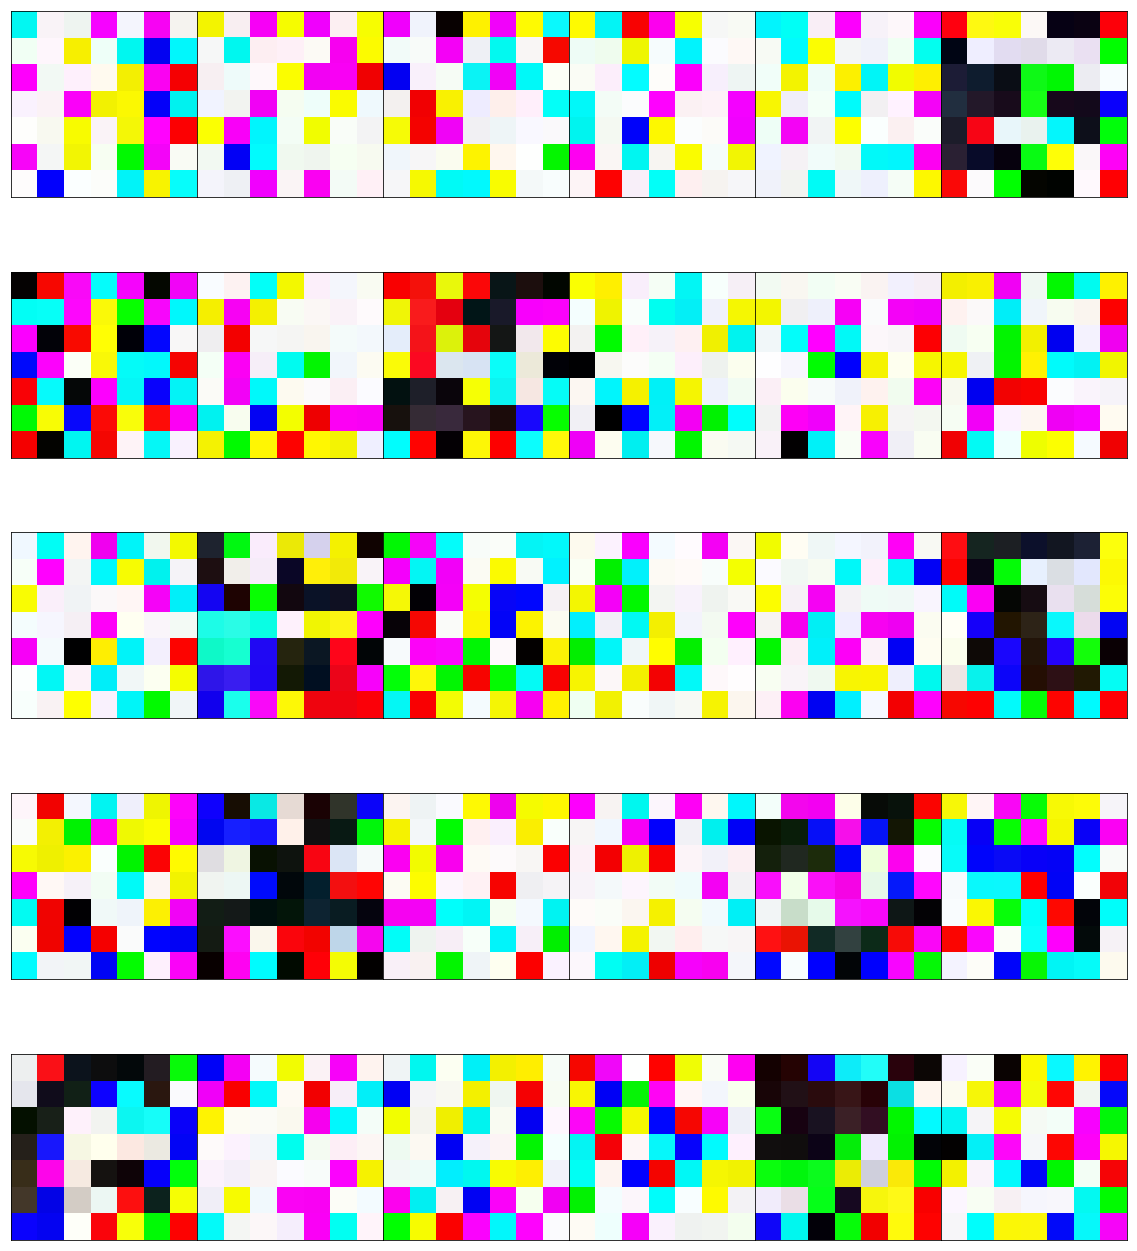

In [9]:
plot_conv1_kernels(data)

## Part 5: Evaluation of the unsupervised models on ImageNet